##  学习率调整

继承于class——LRScheduler
* 主要属性：
* optimizer:关联的优化器
* last_epoch:记录opoch数
* base_lrs:记录初始学习率  
主要方法：  
* step():更新下一个epoch的学习率
* get_lr():虚函数，计算下一个epoch的学习率

### 1.StepLR

功能：等间隔调整学习率  
主要参数：
* step_size:调整间隔数
* gamma：调整系数  
调整方式：lr = lr*gamma

In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1)

LR = 0.1
iteration = 10
max_epoch = 200

In [2]:
weights = torch.randn((1), requires_grad=True)
target = torch.zeros((1))

optimizer = optim.SGD([weights], lr=LR, momentum=0.9)

In [3]:
weights,target

(tensor([0.6614], requires_grad=True), tensor([0.]))

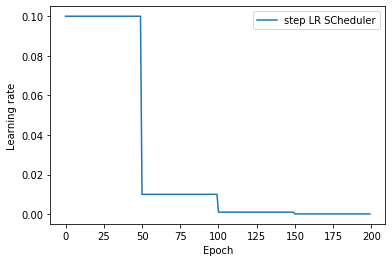

In [4]:
scheduler_lr = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

lr_list,epoch_list = list(),list()
for epoch in range(max_epoch):
    for i in range(iteration):
        loss= torch.pow((weights-target),2)
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
    scheduler_lr.step()
    lr_list.append(scheduler_lr.get_lr())
    epoch_list.append(epoch)
plt.plot(epoch_list,lr_list,label="step LR SCheduler")
plt.xlabel('Epoch')
plt.ylabel('Learning rate')
plt.legend()

### 2MultiSteoLR

功能：按照给定间隔调整学习率
* 主要参数：
* milestones:设定调整时刻数
* gamma：调整系数

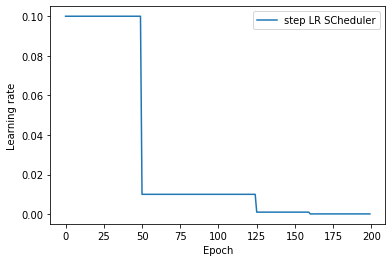

In [5]:
milestones = [50, 125, 160]
scheduler_lr = optim.lr_scheduler.MultiStepLR(optimizer, milestones, gamma=0.1)
lr_list,epoch_list = list(),list()
for epoch in range(max_epoch):
    for i in range(iteration):
        loss= torch.pow((weights-target),2)
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
    scheduler_lr.step()
    lr_list.append(scheduler_lr.get_lr())
    epoch_list.append(epoch)
plt.plot(epoch_list,lr_list,label="step LR SCheduler")
plt.xlabel('Epoch')
plt.ylabel('Learning rate')
plt.legend()

### 3 ExponentialLR

功能：按指数衰减调整学习率
主要参数：
* gamma：指数的底
调整方式：lr = lr * gamma  ** epoch

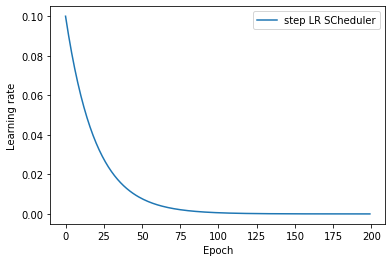

In [6]:
scheduler_lr = optim.lr_scheduler.ExponentialLR(optimizer,gamma=0.95)
lr_list,epoch_list = list(),list()
for epoch in range(max_epoch):
    for i in range(iteration):
        loss= torch.pow((weights-target),2)
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
    scheduler_lr.step()
    lr_list.append(scheduler_lr.get_lr())
    epoch_list.append(epoch)
plt.plot(epoch_list,lr_list,label="step LR SCheduler")
plt.xlabel('Epoch')
plt.ylabel('Learning rate')
plt.legend()

### 4 CosineAnnealingLR

功能：余弦周期调整学习绿 
主要参数：
* T_max:下降周期
* eta_min:学习率下限
调整方式：
$$n_t = n_{min}+1/2(n_{max}-m_{min})(1+cos(T_{cur}/T_{max}pi)$$

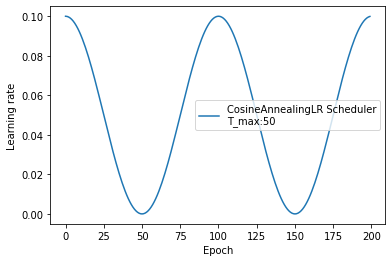

In [7]:
t_max = 50
scheduler_lr = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=t_max, eta_min=0.)

lr_list, epoch_list = list(), list()
for epoch in range(max_epoch):

    for i in range(iteration):

        loss = torch.pow((weights - target), 2)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

    scheduler_lr.step()
    lr_list.append(scheduler_lr.get_lr())
    epoch_list.append(epoch)
plt.plot(epoch_list, lr_list, label="CosineAnnealingLR Scheduler\nT_max:{}".format(t_max))
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.legend()
plt.show()

### 5 ReduceLRonPlateau

功能：监控指标，当指标不再变化则调整  
主要参数：  
* mode:min/max两种模式
* factor：调整系数
* patience：“耐心”,接收几次不变化
* cooldown："冷却时间“，停止监控一段时间
* verbose：是否打印日志
* min_lr:学习率下限
* eps:学习率衰减最小值

In [8]:
loss_value = 0.6
accuray = 0.9

factor = 0.1
mode = "min"
patience = 10
cooldown = 10
min_lr = 1e-4
verbose = True

scheduler_lr = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=factor, mode=mode, patience=patience,
                                                    cooldown=cooldown, min_lr=min_lr, verbose=verbose)

for epoch in range(max_epoch):
    for i in range(iteration):

        # train(...)

        optimizer.step()
        optimizer.zero_grad()

    if epoch == 5:
        loss_value = 0.4

    scheduler_lr.step(loss_value)

Epoch    16: reducing learning rate of group 0 to 9.9901e-03.
Epoch    37: reducing learning rate of group 0 to 9.9901e-04.
Epoch    58: reducing learning rate of group 0 to 1.0000e-04.


### 6 LambdaLR

功能：自定义调整策略  
主要参数：
* lr_lambda:function or list

epoch:    0, lr:[0.1, 0.1]
epoch:    1, lr:[0.1, 0.095]
epoch:    2, lr:[0.1, 0.09025]
epoch:    3, lr:[0.1, 0.0857375]
epoch:    4, lr:[0.1, 0.081450625]
epoch:    5, lr:[0.1, 0.07737809374999999]
epoch:    6, lr:[0.1, 0.07350918906249998]
epoch:    7, lr:[0.1, 0.06983372960937498]
epoch:    8, lr:[0.1, 0.06634204312890622]
epoch:    9, lr:[0.1, 0.0630249409724609]
epoch:   10, lr:[0.1, 0.05987369392383787]
epoch:   11, lr:[0.1, 0.05688000922764597]
epoch:   12, lr:[0.1, 0.05403600876626367]
epoch:   13, lr:[0.1, 0.051334208327950485]
epoch:   14, lr:[0.1, 0.04876749791155296]
epoch:   15, lr:[0.1, 0.046329123015975304]
epoch:   16, lr:[0.1, 0.04401266686517654]
epoch:   17, lr:[0.1, 0.04181203352191771]
epoch:   18, lr:[0.1, 0.039721431845821824]
epoch:   19, lr:[0.1, 0.03773536025353073]
epoch:   20, lr:[0.010000000000000002, 0.03584859224085419]
epoch:   21, lr:[0.010000000000000002, 0.03405616262881148]
epoch:   22, lr:[0.010000000000000002, 0.0323533544973709]
epoch:   23, lr:[0.

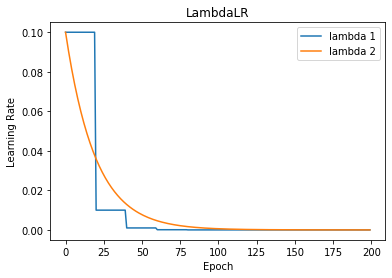

In [9]:
lr_init = 0.1

weights_1 = torch.randn((6, 3, 5, 5))
weights_2 = torch.ones((5, 5))

optimizer = optim.SGD([
    {'params': [weights_1]},
    {'params': [weights_2]}], lr=lr_init)

lambda1 = lambda epoch: 0.1 ** (epoch // 20)
lambda2 = lambda epoch: 0.95 ** epoch

scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=[lambda1, lambda2])

lr_list, epoch_list = list(), list()
for epoch in range(max_epoch):
    for i in range(iteration):

        # train(...)

        optimizer.step()
        optimizer.zero_grad()

    scheduler.step()

    lr_list.append(scheduler.get_lr())
    epoch_list.append(epoch)

    print('epoch:{:5d}, lr:{}'.format(epoch, scheduler.get_lr()))

plt.plot(epoch_list, [i[0] for i in lr_list], label="lambda 1")
plt.plot(epoch_list, [i[1] for i in lr_list], label="lambda 2")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("LambdaLR")
plt.legend()
plt.show()